In [2]:
import hypernetx as hnx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### HYPERGRAPH CREATION AND VISUALIZATION

In [3]:
df = pd.read_csv("artisti_df.csv")
df.head()

0           1           2     3             4              name
0         rock  electronic   indie pop  trap     brazilian   Karylin Granger
1  alternative         USA     Hip-Hop   rap     brazilian    Daven Peniello
2  alternative    american   indie pop   rap  experimental     Webb Goligher
3        indie     hip hop  indie rock   rnb          folk  Margaux Slograve
4          pop         USA     Hip-Hop   rnb  instrumental    Saleem Winning

In [4]:
# creation of the dictionary: keys --> genres
hypergraph_dict = {}

for e in df.iterrows():
    name = e[1][5]
    for i in range(5):
        current = e[1][i]
        if current not in hypergraph_dict:
            hypergraph_dict[current] = [name]
        else:
            hypergraph_dict[current].append(name)

In [5]:
H = hnx.Hypergraph(hypergraph_dict)

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()


C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

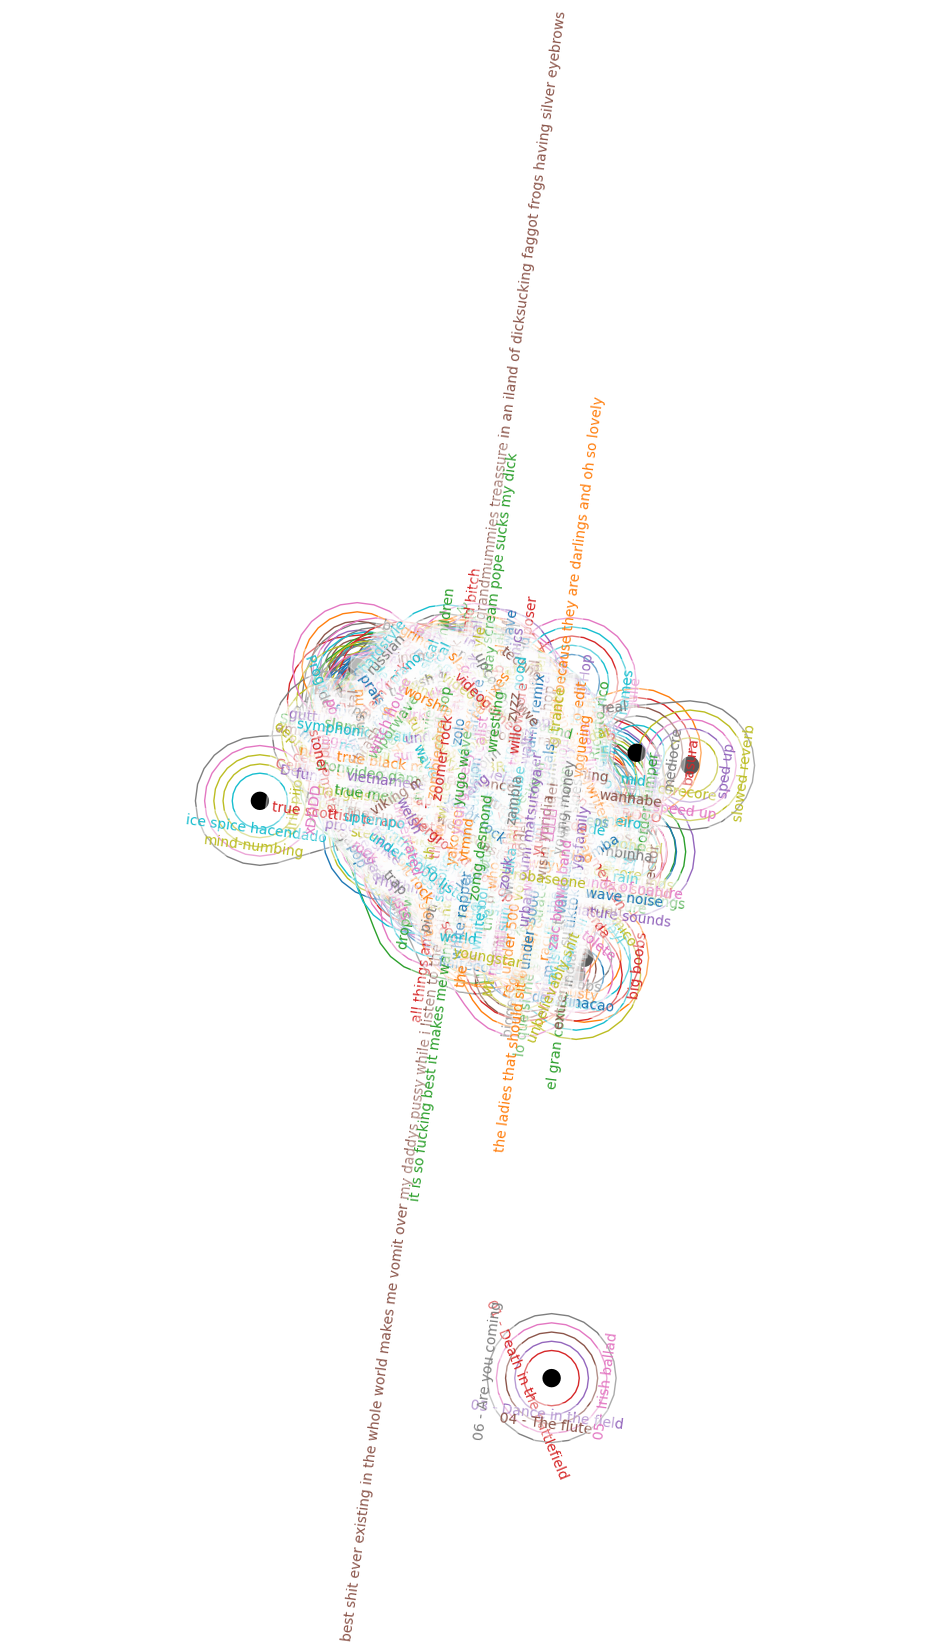

In [127]:
# Plot for all the nodes 
plt.subplots(figsize=(12,12))
hnx.draw(H, with_node_labels=False)

C:\Users\Niccolò\AppData\Local\Temp\ipykernel_11332\3995182416.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = e[1][5]
C:\Users\Niccolò\AppData\Local\Temp\ipykernel_11332\3995182416.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current = e[1][i]
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roa

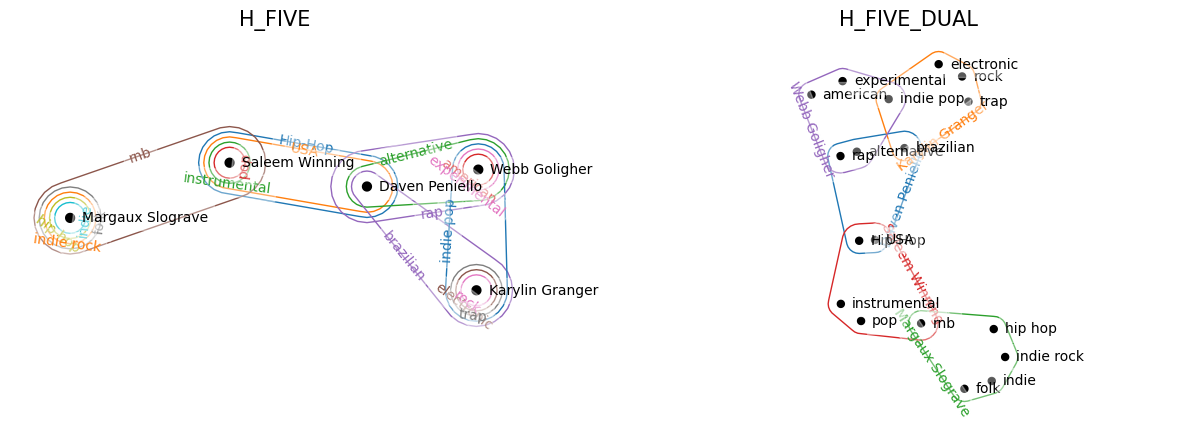

In [139]:
# JUST A VISUALIZATION OF THE FIRST FIVE ARTISTS 

df_FIVE = df.head(5) 

hypergraph_dict_FIVE = {}

for e in df_FIVE.iterrows():
    name = e[1][5]
    for i in range(5):
        current = e[1][i]
        if current not in hypergraph_dict_FIVE:
            hypergraph_dict_FIVE[current] = [name]
        else:
            hypergraph_dict_FIVE[current].append(name)

H_FIVE = hnx.Hypergraph(hypergraph_dict_FIVE)

fig,ax = plt.subplots(1,2,figsize=(15,5))
HD = H_FIVE.dual()
hnx.draw(H_FIVE,ax=ax[0])
ax[0].set_title("H_FIVE",fontsize=15)
hnx.draw(HD,ax=ax[1])
ax[1].set_title("H_FIVE_DUAL",fontsize=15);


### SAMPLING

In [11]:
sample_size = 1000
df = df.sample(n=sample_size, random_state=42)
df.head()

0          1                  2       3           4  \
3434  Alt-country      indie  singer-songwriter    folk   americana   
5515   electronic   japanese            electro  j-core     dubstep   
33    alternative        USA          indie pop    trap   brazilian   
2319         rock  hard rock       classic rock     80s  hair metal   
2900          mpb  seen live             brasil   indie   brazilian   

                   name  
3434             Palace  
5515           Camellia  
33    Consolata Haquard  
2319           Bon Jovi  
2900            Gilsons

In [12]:
# creation of the dictionary: keys --> genres
hypergraph_dict = {}

for e in df.iterrows():
    name = e[1][5]
    for i in range(5):
        current = e[1][i]
        if current not in hypergraph_dict:
            hypergraph_dict[current] = [name]
        else:
            hypergraph_dict[current].append(name)

C:\Users\Niccolò\AppData\Local\Temp\ipykernel_16120\3050125377.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = e[1][5]
C:\Users\Niccolò\AppData\Local\Temp\ipykernel_16120\3050125377.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current = e[1][i]


In [13]:
H_sampled = hnx.Hypergraph(hypergraph_dict)
H_dual_sampled = H_sampled.dual()

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API i

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

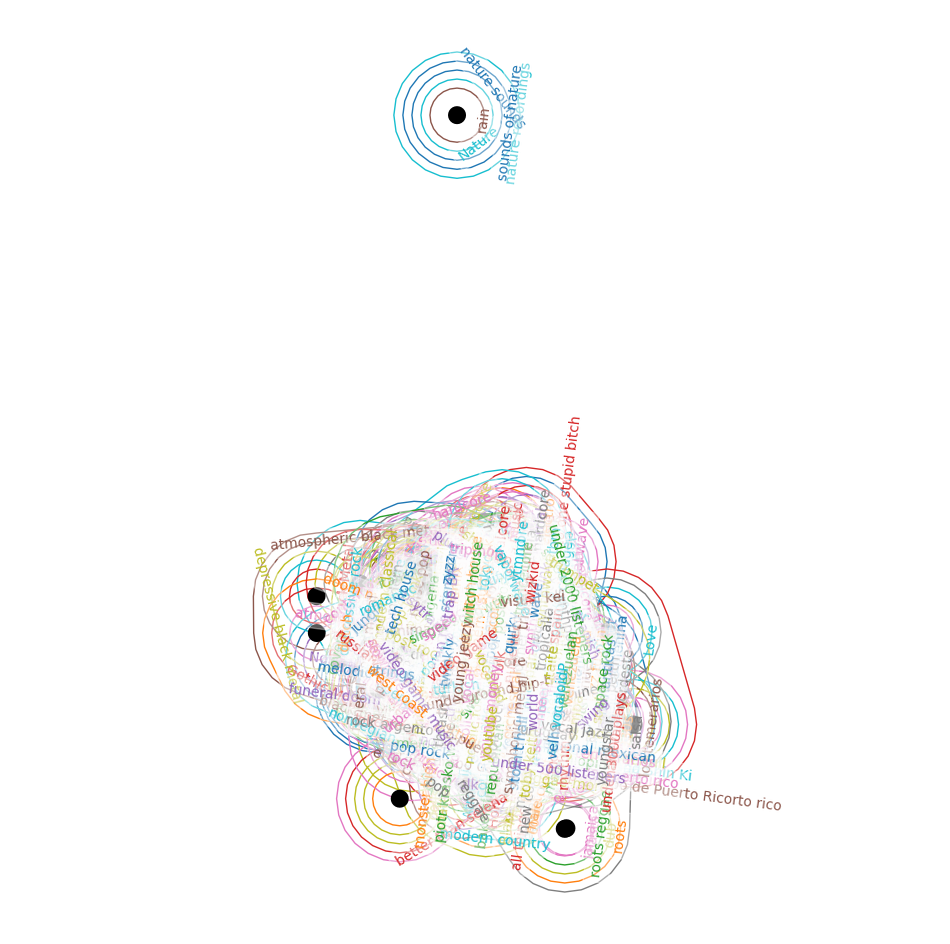

In [12]:
# Plot for 1000 nodes
plt.subplots(figsize=(12,12))
hnx.draw(H_sampled, with_node_labels=False)

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

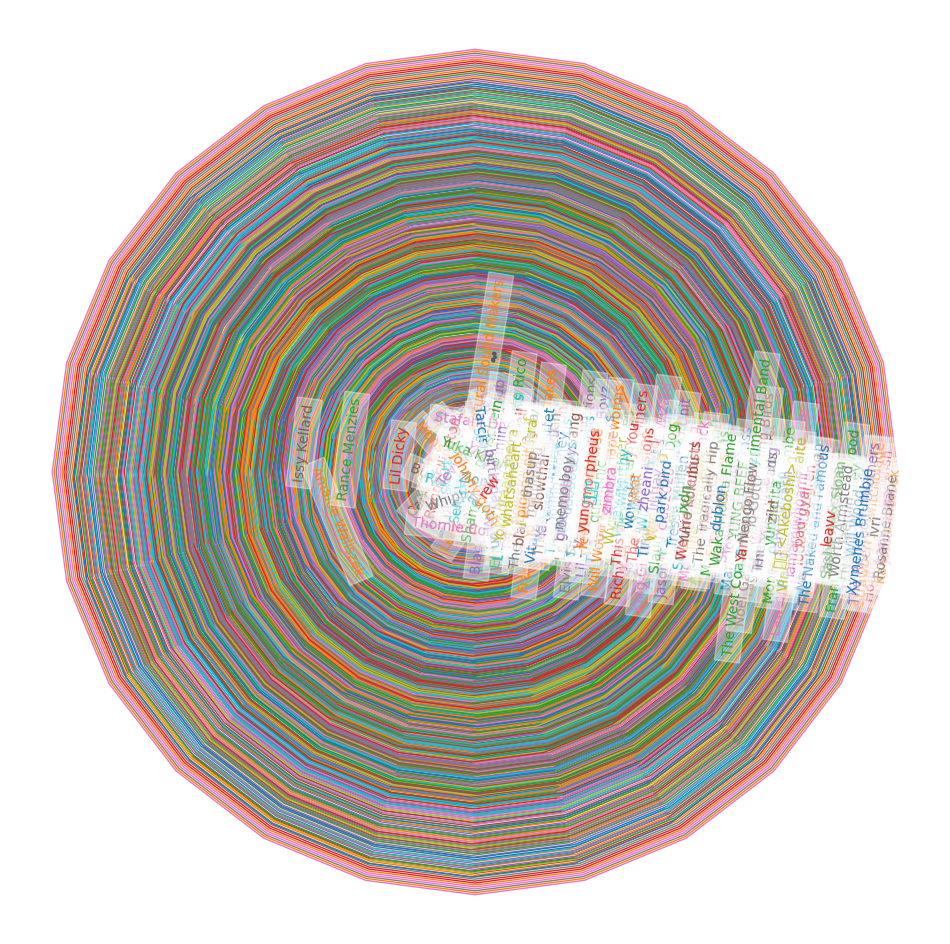

In [13]:
# Plot for 1000 nodes DUAL
plt.subplots(figsize=(12,12))
hnx.draw(H_dual_sampled, with_node_labels=False)

### ANALYSIS 

In [131]:
# aspect ratio misura semplicemente il rapport fra nrows e ncols
print(hnx.info_dict(H))

{'nrows': 10512, 'ncols': 2797, 'aspect ratio': 3.75831247765463, 'ncells': 52560, 'density': 0.001787629603146228}


In [6]:
H_dual = H.dual()

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()


In [43]:
# info per il duale
print(hnx.info_dict(H_dual))

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

{'nrows': 2797, 'ncols': 10512, 'aspect ratio': 0.2660768645357686, 'ncells': 52560, 'density': 0.001787629603146228}


In [151]:
# Return a tuple where the first element is the maximum diameter over all s-components,
# the second element is the list of all s-diameters
# and the third is the list of the s-components

print(H.edge_diameters())

(6, [6, 1, 1, 2], [{'Eddie Santiago', 'regional mexican', 'ali', 'Eurovision 2024', 'Produce 101', 'rock gaucho', '80s disco', 'Bay Area', 'Elio e le Storie Tese', 'nikki sixx', 'funeral doom', 'mpb female', 'neosoul', 'Spanish Metal', 'samba', 'video game remixes', 'finland', 'got7', 'pop rap', 'wonky', 'onedirectioncore', 'bomba', 'cloud rnb', 'jazz fusion ', 'emo', 'soul as shit', 'portland', 'cypriot', 'Glam Metal', 'sub-unit', ' brazilian', '30s', 'cantora de forro', 'Led Zeppelin', 'trancecore', 'choir', 'algerian', 'palestine', 'k-hiphop', 'smosh', 'Funk Carioca', 'progressive death metal', 'mississippi', 's', 'txt', 'the voice', 'acid house', 'Kompakt', 'Lil Wayne', 'Eesti', 'thall', 'somalian trap', 'pixote', 'Pop Metal', 'Hector Lavoe', 'hip hop', 'future beats', 'us', 'male vocalist', 'symphonic deathcore', 'K-hip hop', 'vulf', 'acoustic guitar', 'art pop', 'St Pauli', 'vocalist', 'ocean vibe', 'jazz instrumental', 'nigerian', 'mother', 'Corridos tumbados', 'georgian', 'hOND

For s = 1:
Number of connected components: 4
Sizes of connected components: [2779, 5, 5, 8]
Mean size of connected components: 699.25
Standard deviation of component sizes: 1200.74


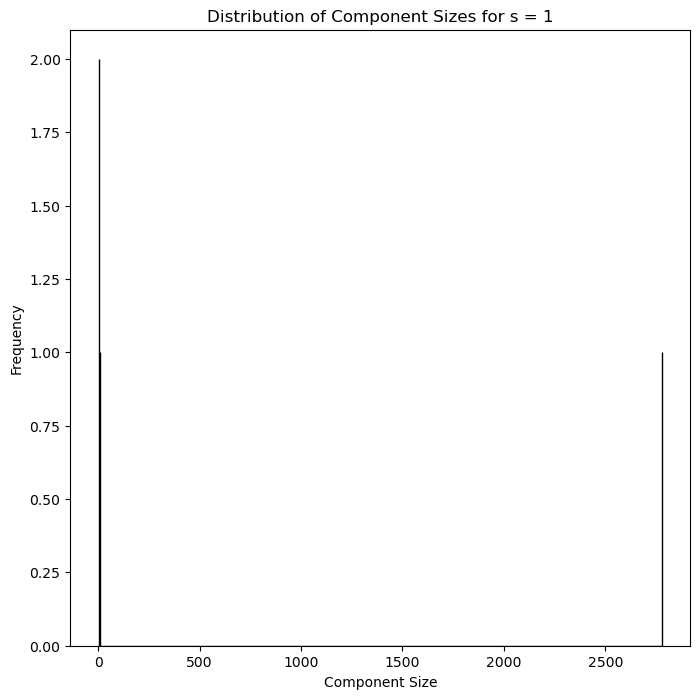



For s = 3:
Number of connected components: 6
Sizes of connected components: [717, 2, 2, 5, 2, 2]
Mean size of connected components: 121.67
Standard deviation of component sizes: 266.24


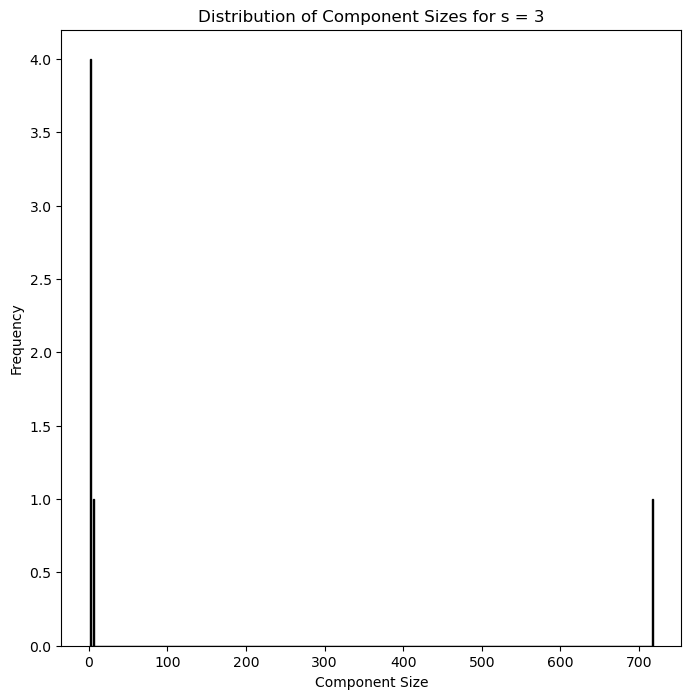



For s = 5:
Number of connected components: 2
Sizes of connected components: [496, 2]
Mean size of connected components: 249.00
Standard deviation of component sizes: 247.00


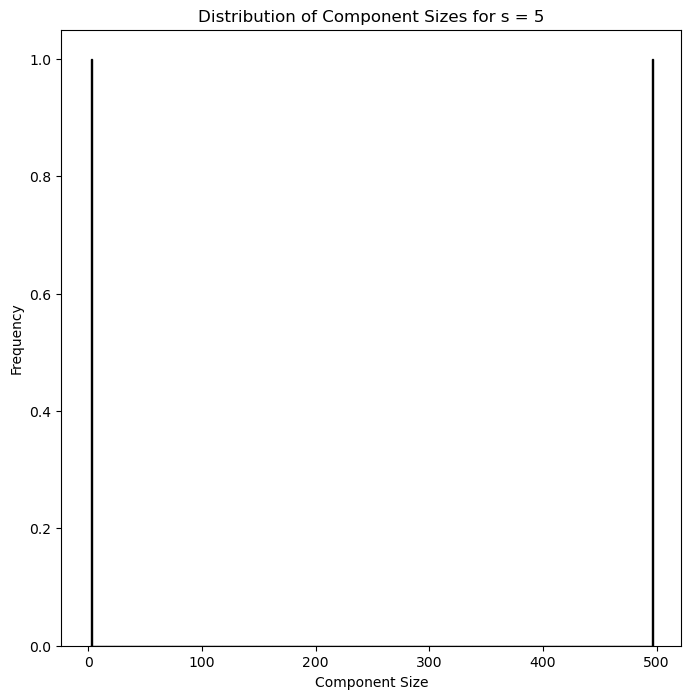



For s = 7:
Number of connected components: 3
Sizes of connected components: [381, 4, 2]
Mean size of connected components: 129.00
Standard deviation of component sizes: 178.19


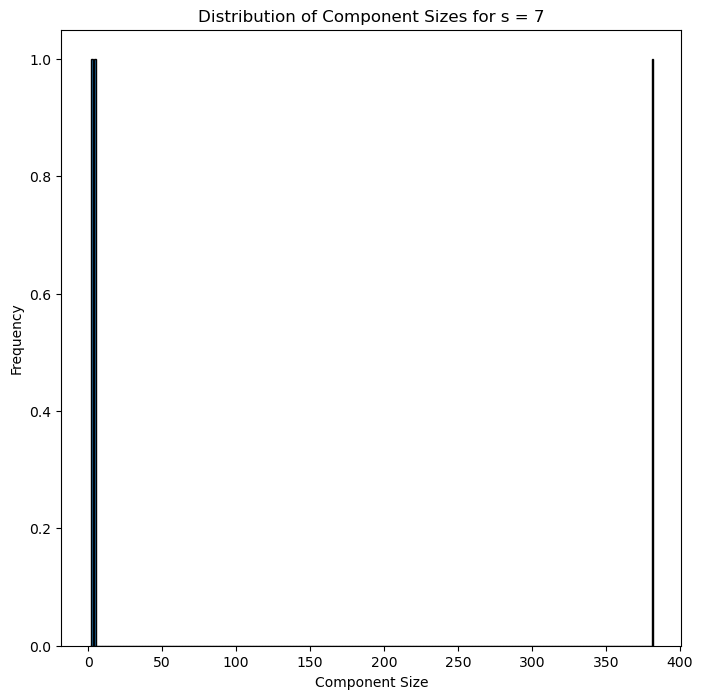

In [19]:
for i in range(1, 9, 2):
    s_connected = H.s_connected_components(s=i)
    component_sizes = [len(e) for e in s_connected]
    num_components = len(component_sizes)
    
    print(f"For s = {i}:")
    print(f"Number of connected components: {num_components}")
    

    if num_components > 0:
        print(f"Sizes of connected components: {component_sizes}")
        print(f"Mean size of connected components: {np.mean(component_sizes):.2f}")
        print(f"Standard deviation of component sizes: {np.std(component_sizes):.2f}")
        
        # Visualize the distribution of component sizes
        plt.hist(component_sizes, bins=range(1, max(component_sizes) + 2), edgecolor='black')
        plt.xlabel('Component Size')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Component Sizes for s = {i}')
        plt.show()
    else:
        print("No connected components found")
    
    print("\n")   

In [ ]:
# DUAL

'''for i in range(1, 9, 2):
    s_connected = H_dual.s_connected_components(s=i)
    component_sizes = [len(e) for e in s_connected]
    num_components = len(component_sizes)
    
    print(f"For s = {i}:")
    print(f"Number of connected components: {num_components}")
    
    if num_components > 0:
        print(f"Sizes of connected components: {component_sizes}")
        print(f"Mean size of connected components: {np.mean(component_sizes):.2f}")
        print(f"Standard deviation of component sizes: {np.std(component_sizes):.2f}")
        
    else:
        print("No connected components found")
    
    print("\n") '''

# MEMORY ERROR

For sampled data

In [20]:
print(hnx.info_dict(H_sampled))

{'nrows': 1000, 'ncols': 691, 'aspect ratio': 1.447178002894356, 'ncells': 5000, 'density': 0.00723589001447178}


C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()


In [21]:
# info per il duale
print(hnx.info_dict(H_dual_sampled))

{'nrows': 691, 'ncols': 1000, 'aspect ratio': 0.691, 'ncells': 5000, 'density': 0.00723589001447178}


In [22]:
# Return a tuple where the first element is the maximum diameter over all s-components,
# the second element is the list of all s-diameters
# and the third is the list of the s-components

print(H_sampled.edge_diameters())

(5, [5, 1], [{'alternative', 'Broadway', 'Philadelphia', 'league of legends', 'ska', 'Melodic Death Metal', 'done', 'cash money', 'french', 'UK', 'new romantic', 'musicals', 'black metal', 'nordic folk', 'russian rap', 'big beat', 'los temerarios', 'Pagode', 'alternative rap', 'visual kei', 'deep house', 'minimal wave', 'chillout', 'glo', 'pop rock', 'BANDA', 'post-emo', 'modern country', 'Disco', 'grindcore', 'composers', 'speedcore', 'olympia', 'loud', 'nederlands', 'Belgium', 'thai pop', 'ska punk', 'soul', 'United States', 'Doom', 'deathcore', 'maryland', 'bts', 'dark cabaret', 'trip-hop', 'Greek', 'funky house', 'britpop', 'parody', '3', 'hip pop', 'Psychedelic Rock', 'twinkly', 'Post-Metal', 'piano rock', 'cloud rap', 'New Orleans', 'compton', 'africa', 'drain', 'portuguese', 'young money', 'zyzz', 'spanish', 'Drum and bass', 'japanese', 'jungle', 'humor', 'appalachian', 'brazil', 'ytmnd', 'venezuela', 'psytrance', 'mexican', 'Rock Argentino', 'motown', 'USA', 'French jazz', 'met

In [23]:
# Return a tuple where the first element is the maximum diameter over all s-components,
# the second element is the list of all s-diameters
# and the third is the list of the s-components

print(H_dual_sampled.edge_diameters())

(4, [4, 0], [{'Jawsh 685', 'Hedwiga Pamphilon', 'Palace', 'Patti LaBelle', 'Agent Orange', 'Steve Aoki', 'Benji Blue Bills', 'Germ', 'Gnni Stratton', 'Maneva', 'PUP', 'Makoto Matsushita', 'St. Vincent', 'FUTURE PALACE', 'Tkay Maidza', 'Becky McGonigle', 'Noisettes', 'The Altons', 'Alvera Friend', 'Cities Aviv', 'Easy Life', 'Penelope Scott', 'Al Bowlly', 'Chairlift', 'Adoniran Barbosa', 'Dizzy Fae', "Noel Gallagher's High Flying Birds", 'Rockie Seiffert', 'Susumu Hirasawa', 'draag me', 'Immanuel Ludwig', 'Brew Hunnable', 'Audrye Dirkin', 'Lil Jon & The East Side Boyz', 'Babyface Ray', 'Ingeberg Breese', 'Fly Project', 'Nill', 'Richy Mitch & The Coal Miners', 'Laurens Hook', 'Jamie Jones', 'Brett Willshere', 'Tricky', 'i9bonsai', 'Haskel Golby', 'SurFaces', 'H1-KEY', 'Jazz Liberatorz', 'Royce da 5\'9"', 'Gnash', 'Mitchel Myrkus', 'Max Coveri', 'Mitchell Martinez', 'Meredithe McKeag', 'rew', 'Hamish Fewster', 'Elston Knappen', 'James', 'Sloan Beartup', 'DJ HEARTSTRING', 'Arca', 'CONRO', 

For s = 1:
Number of connected components: 2
Sizes of connected components: [686, 5]
Mean size of connected components: 345.50
Standard deviation of component sizes: 340.50


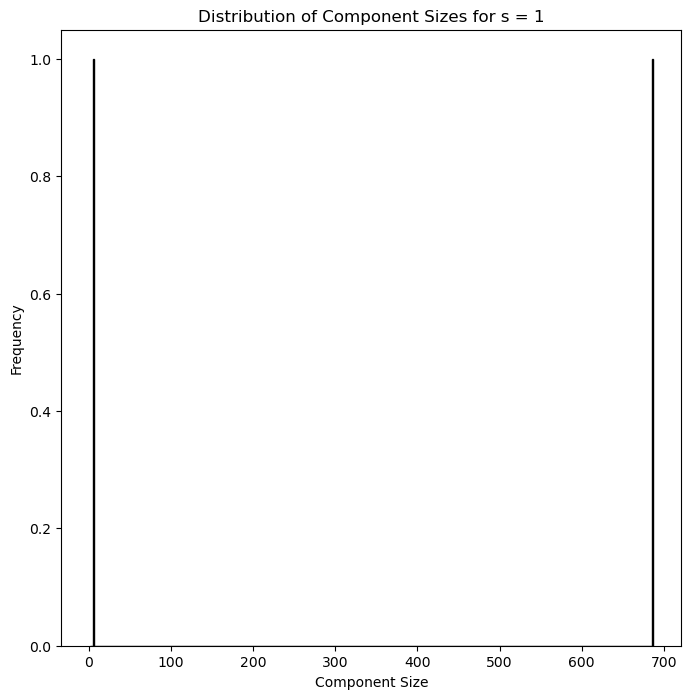



For s = 3:
Number of connected components: 1
Sizes of connected components: [151]
Mean size of connected components: 151.00
Standard deviation of component sizes: 0.00


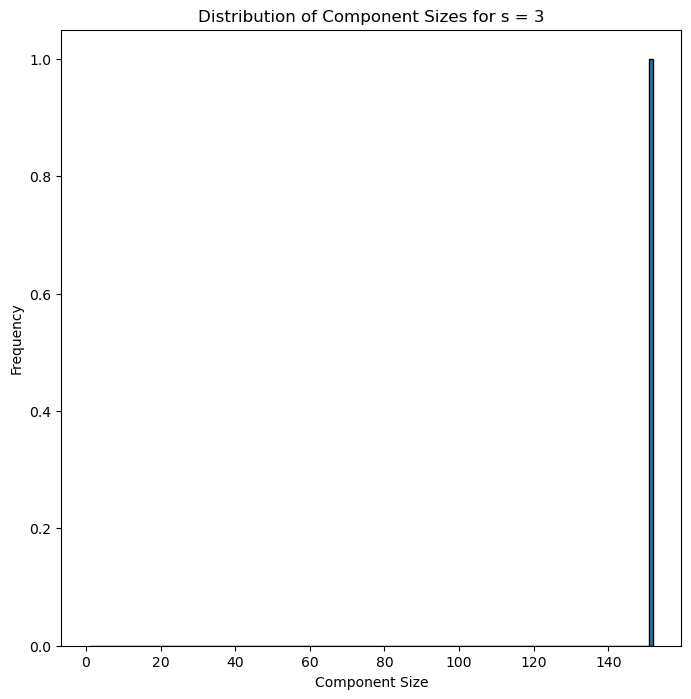



For s = 5:
Number of connected components: 1
Sizes of connected components: [93]
Mean size of connected components: 93.00
Standard deviation of component sizes: 0.00


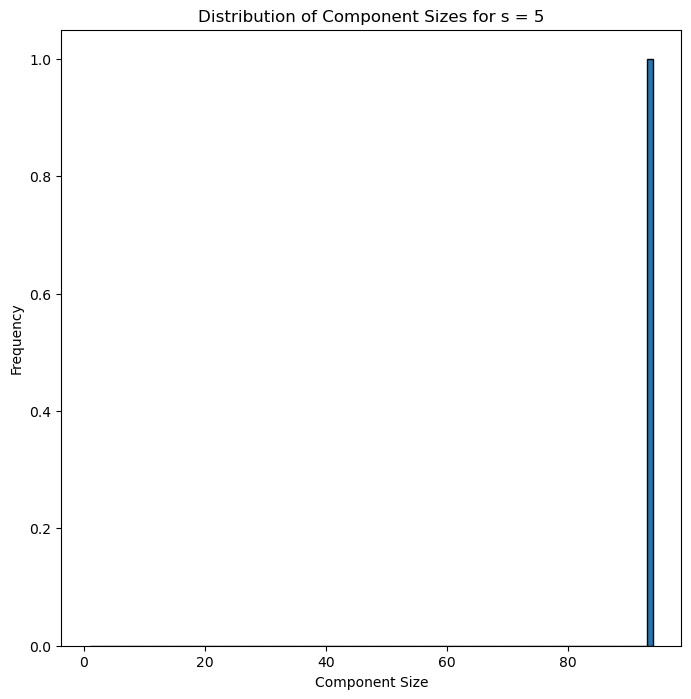



For s = 7:
Number of connected components: 3
Sizes of connected components: [2, 59, 3]
Mean size of connected components: 21.33
Standard deviation of component sizes: 26.64


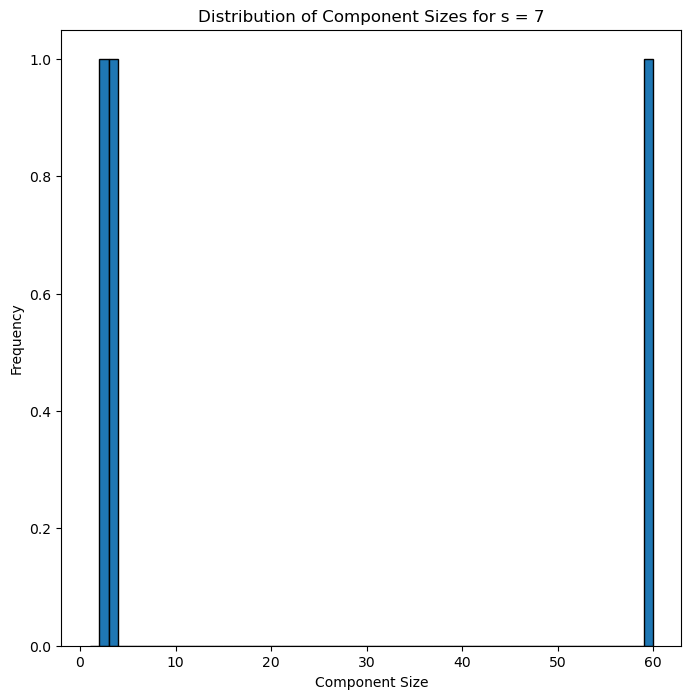

In [14]:
for i in range(1, 9, 2):
    s_connected = H_sampled.s_connected_components(s=i)
    component_sizes = [len(e) for e in s_connected]
    num_components = len(component_sizes)
    
    print(f"For s = {i}:")
    print(f"Number of connected components: {num_components}")
    
    if num_components > 0:
        print(f"Sizes of connected components: {component_sizes}")
        print(f"Mean size of connected components: {np.mean(component_sizes):.2f}")
        print(f"Standard deviation of component sizes: {np.std(component_sizes):.2f}")
        
        # Visualize the distribution of component sizes
        plt.hist(component_sizes, bins=range(1, max(component_sizes) + 2), edgecolor='black')
        plt.xlabel('Component Size')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Component Sizes for s = {i}')
        plt.show()
    else:
        print("No connected components found")
    
    print("\n")  

For s = 1:
Number of connected components: 1
Sizes of connected components: [999]
Mean size of connected components: 999.00
Standard deviation of component sizes: 0.00


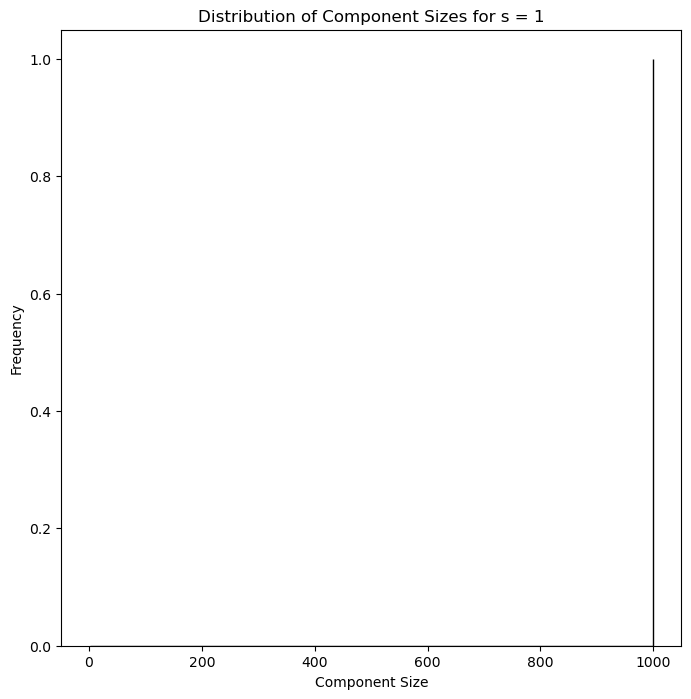



For s = 3:
Number of connected components: 21
Sizes of connected components: [791, 9, 4, 2, 9, 4, 3, 2, 3, 3, 10, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Mean size of connected components: 40.95
Standard deviation of component sizes: 167.73


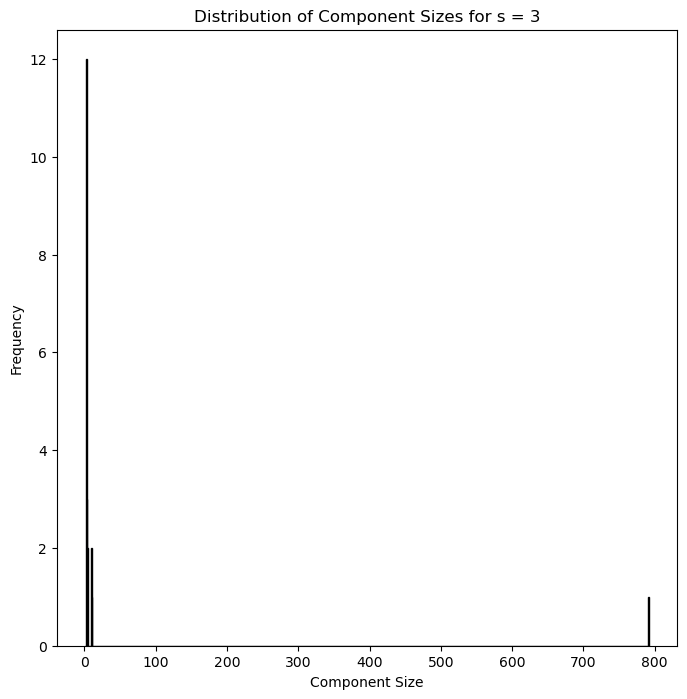



For s = 5:
Number of connected components: 32
Sizes of connected components: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Mean size of connected components: 2.00
Standard deviation of component sizes: 0.00


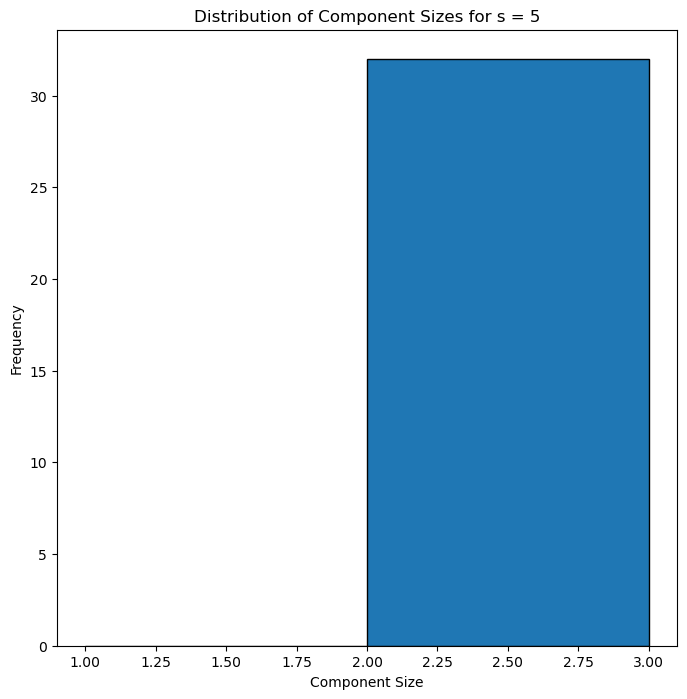



For s = 7:
Number of connected components: 0
No connected components found




In [19]:
# DUAL 
for i in range(1, 9, 2):
    s_connected = H_dual_sampled.s_connected_components(s=i)
    component_sizes = [len(e) for e in s_connected]
    num_components = len(component_sizes)
    
    print(f"For s = {i}:")
    print(f"Number of connected components: {num_components}")
    
    if num_components > 0:
        print(f"Sizes of connected components: {component_sizes}")
        print(f"Mean size of connected components: {np.mean(component_sizes):.2f}")
        print(f"Standard deviation of component sizes: {np.std(component_sizes):.2f}")
        
        # Visualize the distribution of component sizes
        plt.hist(component_sizes, bins=range(1, max(component_sizes) + 2), edgecolor='black')
        plt.xlabel('Component Size')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Component Sizes for s = {i}')
        plt.show()
    else:
        print("No connected components found")
    
    print("\n")  

### DEGREE CENTRALITY

In [27]:
# all the nodes has 5 degrees (5 genres for each artist trivially)
degree_distribution = hnx.degree_dist(H, aggregated= True)

print("Degree Distribution of Hypergraph H:")
for degree, count in degree_distribution.items():
    print(f"Degree {degree}: {count} vertices")


Degree Distribution of Hypergraph H:
Degree 5: 10512 vertices


In [29]:
# dual top 5
H_dual = H.dual()
res = {}
for node in H_dual.nodes:
    res[node] = H_dual.degree(node)

top_5 = sorted(res.items(), key = lambda item: item[1], reverse = True)[:5]
print(top_5)

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()


[('pop', 2120), ('electronic', 1950), ('seen live', 1870), ('indie', 1860), ('rock', 1767)]


For sampled data

In [25]:
# dual top 5

res = {}
for node in H_dual_sampled.nodes:
    res[node] = H_dual_sampled.degree(node)

top_5 = sorted(res.items(), key = lambda item: item[1], reverse = True)[:5]
print(top_5)

[('pop', 215), ('electronic', 202), ('seen live', 174), ('rock', 170), ('indie', 165)]


### CLOSENESS

In [30]:
d = hnx.s_closeness_centrality(H, s = 1)

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

In [31]:
top_5_edges = sorted(d.items(), key=lambda item: item[1], reverse=True)[:5]
print(top_5_edges)

[('01 - Death in the battlefield', 1.0), ('03 - Dance in the field', 1.0), ('04 - The flute', 1.0), ('05 - Irish ballad', 1.0), ('06 - Are you coming', 1.0)]


In [ ]:
# d = hnx.s_closeness_centrality(H_dual, s = 1)
# TOO EXPENSIVE TO CALCULATE

For sampled data

In [27]:
d = hnx.s_closeness_centrality(H_sampled, s= 1)

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

In [28]:
top_5_edges = sorted(d.items(), key=lambda item: item[1], reverse=True)[:5]
print(top_5_edges)

[('Nature', 1.0), ('nature recordings', 1.0), ('nature sounds', 1.0), ('rain', 1.0), ('sounds of nature', 1.0)]


In [30]:
d = hnx.s_closeness_centrality(H_dual_sampled, s= 1)

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

In [31]:
top_5_edges = sorted(d.items(), key=lambda item: item[1], reverse=True)[:5]
print(top_5_edges)

[('Natural Sound Makers', 0)]


### ER HYPERGRAPH (W.R.T. SAMPLED)

In [33]:
import hypernetx.algorithms.generative_models as gm

In [51]:
n = 1000
m = 691
p = 0.005

# generate ER hypergraph
H_ER = gm.erdos_renyi_hypergraph(n, m, p)

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()


C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

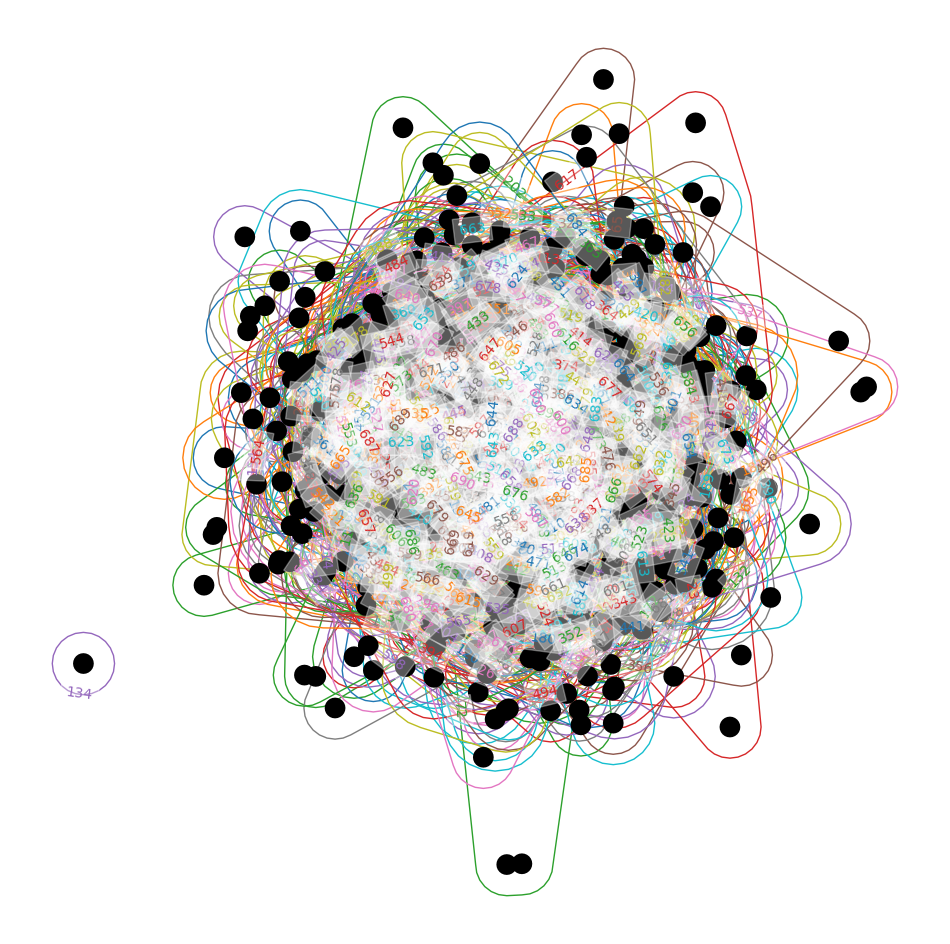

In [52]:
plt.subplots(figsize=(12,12))
hnx.draw(H_ER, with_node_labels=False)

In [53]:
print(hnx.info_dict(H_ER))

{'nrows': 967, 'ncols': 687, 'aspect ratio': 1.4075691411935953, 'ncells': 3416, 'density': 0.0051420305300536335}


In [54]:
# Return a tuple where the first element is the maximum diameter over all s-components,
# the second element is the list of all s-diameters
# and the third is the list of the s-components

print(H_ER.edge_diameters())

(5, [5, 0, 0], [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

For s = 1:
Number of connected components: 1
Sizes of connected components: [685]
Mean size of connected components: 685.00
Standard deviation of component sizes: 0.00


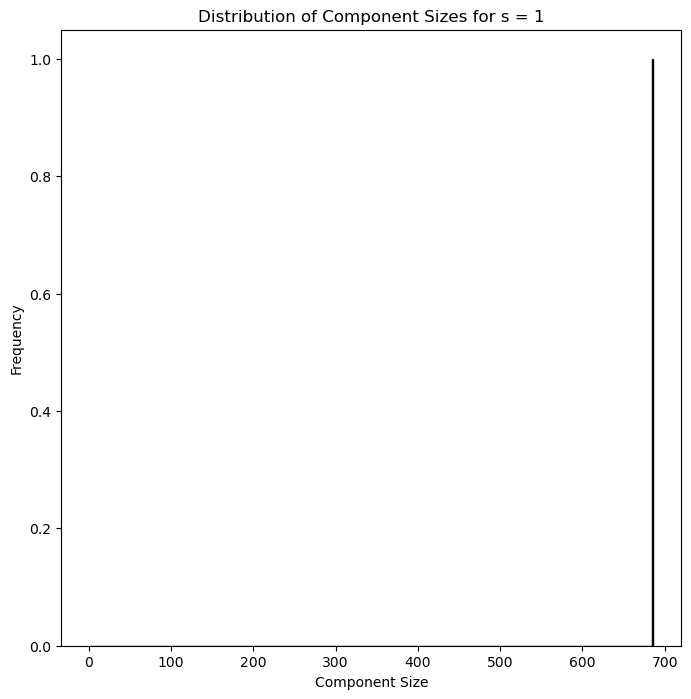



For s = 3:
Number of connected components: 0
No connected components found


For s = 5:
Number of connected components: 0
No connected components found


For s = 7:
Number of connected components: 0
No connected components found




In [55]:
for i in range(1, 9, 2):
    s_connected = H_ER.s_connected_components(s=i)
    component_sizes = [len(e) for e in s_connected]
    num_components = len(component_sizes)
    
    print(f"For s = {i}:")
    print(f"Number of connected components: {num_components}")
    
    if num_components > 0:
        print(f"Sizes of connected components: {component_sizes}")
        print(f"Mean size of connected components: {np.mean(component_sizes):.2f}")
        print(f"Standard deviation of component sizes: {np.std(component_sizes):.2f}")
        
        # Visualize the distribution of component sizes
        plt.hist(component_sizes, bins=range(1, max(component_sizes) + 2), edgecolor='black')
        plt.xlabel('Component Size')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Component Sizes for s = {i}')
        plt.show()
    else:
        print("No connected components found")
    
    print("\n")  

In [56]:
# ER top 5 degree

res = {}
for node in H_ER.nodes:
    res[node] = H_ER.degree(node)

top_5 = sorted(res.items(), key = lambda item: item[1], reverse = True)[:5]
print(top_5)

[(628, 10), (5, 9), (22, 8), (145, 8), (191, 8)]


In [58]:
d = hnx.s_closeness_centrality(H_ER, s = 1)

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

In [59]:
top_5_edges = sorted(d.items(), key=lambda item: item[1], reverse=True)[:5]
print(top_5_edges)

[(134, 0)]


ER_DUAL

In [60]:
ER_DUAL = H_ER.dual() 

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()


C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

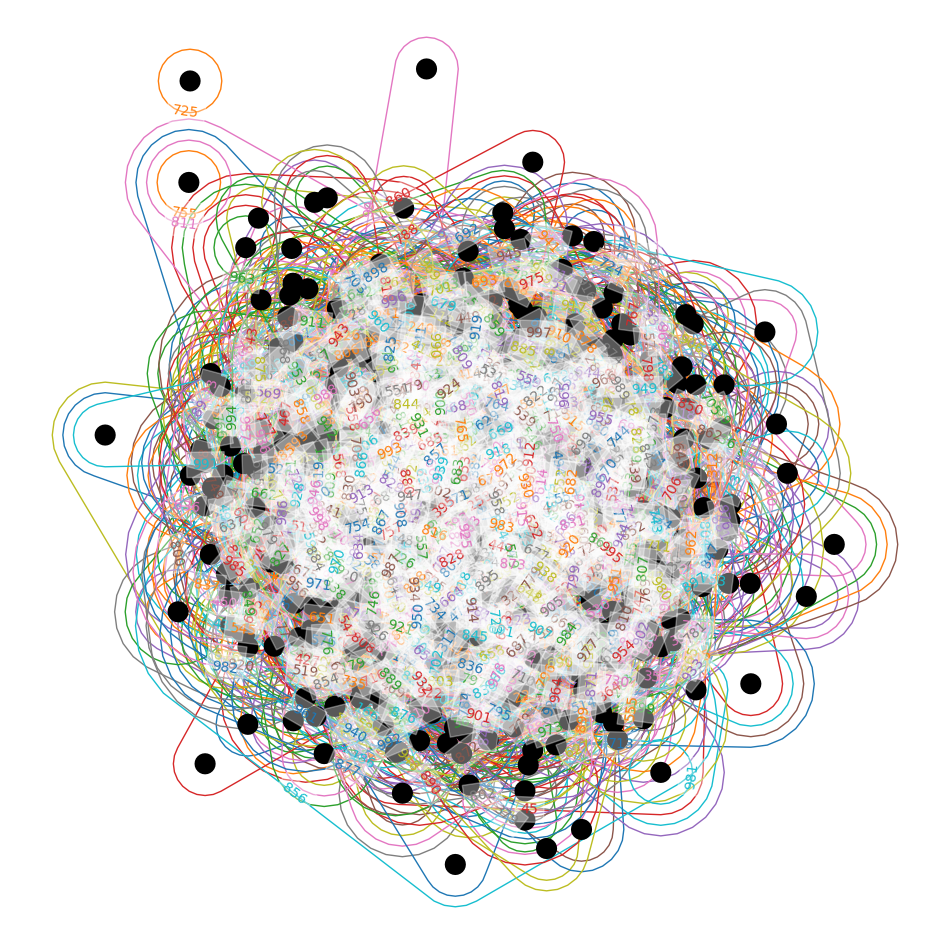

In [61]:
plt.subplots(figsize=(12,12))
hnx.draw(ER_DUAL, with_node_labels=False)

In [62]:
print(hnx.info_dict(ER_DUAL))

{'nrows': 687, 'ncols': 967, 'aspect ratio': 0.7104446742502585, 'ncells': 3416, 'density': 0.0051420305300536335}


In [63]:
# Return a tuple where the first element is the maximum diameter over all s-components,
# the second element is the list of all s-diameters
# and the third is the list of the s-components

print(ER_DUAL.edge_diameters())

(6, [6, 1, 0], [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 

For s = 1:
Number of connected components: 2
Sizes of connected components: [964, 2]
Mean size of connected components: 483.00
Standard deviation of component sizes: 481.00


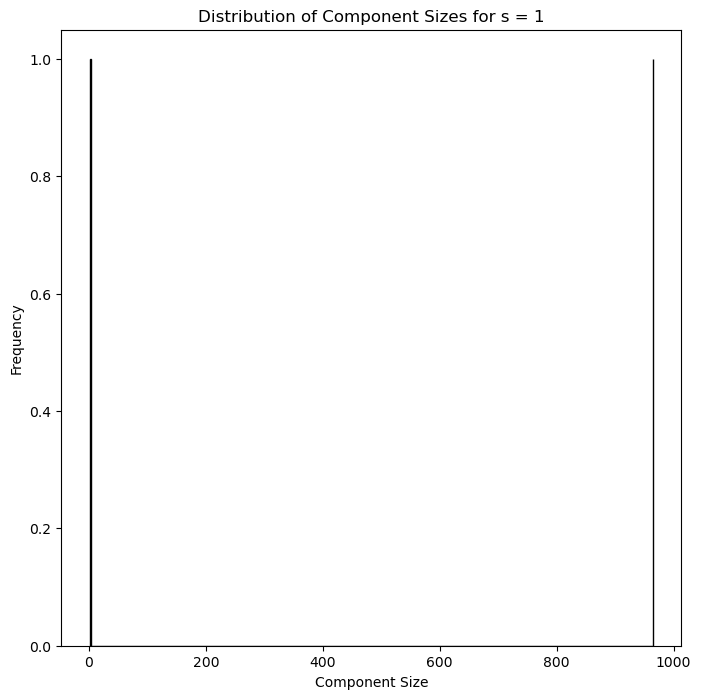



For s = 3:
Number of connected components: 0
No connected components found


For s = 5:
Number of connected components: 0
No connected components found


For s = 7:
Number of connected components: 0
No connected components found




In [64]:
for i in range(1, 9, 2):
    s_connected = ER_DUAL.s_connected_components(s=i)
    component_sizes = [len(e) for e in s_connected]
    num_components = len(component_sizes)
    
    print(f"For s = {i}:")
    print(f"Number of connected components: {num_components}")
    
    if num_components > 0:
        print(f"Sizes of connected components: {component_sizes}")
        print(f"Mean size of connected components: {np.mean(component_sizes):.2f}")
        print(f"Standard deviation of component sizes: {np.std(component_sizes):.2f}")
        
        # Visualize the distribution of component sizes
        plt.hist(component_sizes, bins=range(1, max(component_sizes) + 2), edgecolor='black')
        plt.xlabel('Component Size')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Component Sizes for s = {i}')
        plt.show()
    else:
        print("No connected components found")
    
    print("\n") 

In [65]:
# ER DUAL top 5 degree

res = {}
for node in ER_DUAL.nodes:
    res[node] = ER_DUAL.degree(node)

top_5 = sorted(res.items(), key = lambda item: item[1], reverse = True)[:5]
print(top_5)

[(178, 13), (243, 12), (654, 12), (42, 11), (176, 11)]


In [66]:
d = hnx.s_closeness_centrality(ER_DUAL, s = 1)

C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
C:\Users\Niccolò\AppData\Roaming\Python\Python39\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

In [67]:
top_5_edges = sorted(d.items(), key=lambda item: item[1], reverse=True)[:5]
print(top_5_edges)

[(725, 0)]
